## Assignment-07 First Step of using machine learning and models.

![](https://github.com/Computing-Intelligence/jupyters_and_slides/raw/master/entrance-test/images/kkb-ai.png)

In [1]:
fname = 'D:\Github_project\data\sqlResult_1558435.csv'

In [2]:
import pandas as pd

In [3]:
content = pd.read_csv(fname, encoding='gb18030')

In [4]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [5]:
xinhua_news = content[content['source'] == '新华社']

In [6]:
len(xinhua_news) / len(content)

0.8778051801676133

### 任务描述

报社等相关的机构，往往会遇到一个问题，就是别人家的机构使用自己的文章但是并没有标明来源。 在本次任务中，我们将解决新华社的文章被抄袭引用的问题。

给定的数据集合中，存在一些新闻预料，该预料是来自新华社，但是其来源并不是新华社，请设计技巧学习模型解决该问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1566105348906&di=ee9a2de91207767364853d4decc6cca3&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_png%2FTicO2kbP6Ao5sCsSQDpehZiczLdC6hDCNvoicjcOCEKX2bLxBc9gVOw28zHyFibfIWq9ceRibP6HDTKReGkr6YyTfQQ%2F640%3Fwx_fmt%3Dpng)

### Step1: 数据分析

请在课程的GitHub中下载数据集，然后使用pandas进行读取。

In [7]:
# 上面已实现

### Step2: 数据预处理

将pandas中的数据，依据是否是新华社的文章，请改变成新的数据dataframe: <content, y>, 其中，content是文章内容，y是0或者1. 你可能要使用到pandas的dataframe操作。https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [8]:
# it's your time
df = pd.DataFrame(content, columns=['content', 'source'])

In [9]:
df.head()

,content,source
0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,快科技@http://www.kkj.cn/
1,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,快科技@http://www.kkj.cn/
2,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,快科技@http://www.kkj.cn/
3,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,新华社
4,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,深圳大件事


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89611 entries, 0 to 89610
Data columns (total 2 columns):
content    87054 non-null object
source     89609 non-null object
dtypes: object(2)
memory usage: 1.4+ MB


In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87052 entries, 0 to 89610
Data columns (total 2 columns):
content    87052 non-null object
source     87052 non-null object
dtypes: object(2)
memory usage: 2.0+ MB


In [13]:
df.source[df['source'] != '新华社'] = 0
df.source[df['source'] == '新华社'] = 1

In [14]:
df['source'].value_counts()

1    78661
0     8391
Name: source, dtype: int64

In [15]:
df.rename(columns={'source':'y'}, inplace=True) 

In [16]:
df.head()

,content,y
0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,0
1,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,0
2,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,0
3,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,1
4,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,0


### Step3: 使用tfidf进行文本向量化

参考 https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 对

对文本进行向量化

In [17]:
import re
def token(string): return re.findall(r'[\w]+', string)

In [18]:
import jieba
def cut(string): return ' '.join(jieba.cut(string))

In [19]:
corpus = [cut(''.join(token(content))) for content in df['content']]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\RYANWU~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.778 seconds.
Prefix dict has been built succesfully.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=200)
X = vectorizer.fit_transform(corpus)

In [ ]:
X.shape

In [23]:
y = df['y']

In [24]:
y.shape

(87052,)

### Step4: 参考scikit-learning的方法，构建你的第一个机器学习模型

+ 按照课程讲解的内容，把数据集分割为 traning_data, validation_data, test_data. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [28]:
X_train.shape

(69641, 1000)

In [29]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [30]:
y_train.shape

(69641,)

In [31]:
import numpy as np
X_tr_arr = X_train.toarray()
X_ts_arr = X_test.toarray()
y_tr_arr = np.array(y_train, dtype='int')
y_ts_arr = np.array(y_test, dtype='int')

In [32]:
type(X_tr_arr)

numpy.ndarray

In [90]:
type(y_tr_arr)

numpy.ndarray

In [91]:
X_tr_arr.dtype

dtype('float64')

In [92]:
X_tr_arr.shape

(69641, 200)

In [93]:
y_tr_arr

array([0, 1, 1, ..., 1, 0, 1])

In [94]:
y_tr_arr.shape

(69641,)

+ 参照scikit learning的示例，从构建你的第一个KNN机器学习模型。

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn = KNeighborsClassifier()
knn.fit(X_tr_arr, y_tr_arr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [97]:
knn.score(X_tr_arr, y_tr_arr)

0.9512069039789779

In [98]:
test = vectorizer.transform([cut(''.join(token('这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车')))]).toarray()

In [99]:
knn.predict(test)

array([1])

In [101]:
knn.score(X_ts_arr, y_ts_arr)

0.930101659870197

### Step5: 在traning_data, validation_data, test_data 上观察其相关metric: recall, precision, f1等， 并解释其含义. 

#### Precision又叫查准率，Recall又叫查全率。这两个指标共同衡量才能评价模型输出结果。

- TP: 预测为1(Positive)，实际也为1(Truth-预测对了)
- TN: 预测为0(Negative)，实际也为0(Truth-预测对了)
- FP: 预测为1(Positive)，实际为0(False-预测错了)
- FN: 预测为0(Negative)，实际为1(False-预测错了)
- 总的样本个数为：TP+TN+FP+FN。

#### Accuracy/Precision/Recall的定义
- Accuracy = (预测正确的样本数)/(总样本数)=(TP+TN)/(TP+TN+FP+FN)

- Precision = (预测为1且正确预测的样本数)/(所有预测为1的样本数) = TP/(TP+FP)

- Recall = (预测为1且正确预测的样本数)/(所有真实情况为1的样本数) = TP/(TP+FN)

#### 但由于Precision/Recall是两个值，无法根据两个值来对比模型的好坏。有没有一个值能综合Precision/Recall呢？有，它就是F1。

- F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [20]:
def get_F1(y_predicts, y_facts):
    tp = tn = fp = fn = 0
    for (y_predict, y_fact) in zip(y_predicts, y_facts):
        if y_predict == 1 and y_fact == 1:
            tp += 1
        if y_predict == 0 and y_fact == 0:
            tn += 1
        if y_predict == 1 and y_fact == 0:
            fp += 1
        if y_predict == 0 and y_fact == 1:
            fn += 1
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall) 
    print('accuracy: %s' % str(accuracy))
    print('precision: %s' % str(precision))
    print('recall: %s' % str(recall))
    print('f1: %s' % str(f1))
    return (accuracy, precision, recall, f1)

### Step6: 使用 test_data 对其进行新数据的判断

In [104]:
y_predicts_train = knn.predict(X_tr_arr)

In [142]:
get_F1(y_predicts_train, y_tr_arr)

accuracy: 0.9512069039789779
precision: 0.9644992584497697
recall: 0.9821317860265479
f1: 0.9732356647763074


In [124]:
y_predicts_test = knn.predict(X_ts_arr)
get_F1(y_predicts_test, y_ts_arr)

accuracy: 0.930101659870197
precision: 0.9516058892961421
recall: 0.9722010662604722
f1: 0.9617932376856183


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_ts_arr, y_predicts_test))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59      1655
           1       0.95      0.97      0.96     15756

    accuracy                           0.93     17411
   macro avg       0.81      0.75      0.78     17411
weighted avg       0.92      0.93      0.93     17411



### Step7: 调整不同的参数，观察变化

In [147]:
vectorizer = TfidfVectorizer(max_features=5)
X = vectorizer.fit_transform(corpus)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
X_tr_arr = X_train.toarray()
X_ts_arr = X_test.toarray()
y_tr_arr = np.array(y_train, dtype='int')
y_ts_arr = np.array(y_test, dtype='int')

In [149]:
knn = KNeighborsClassifier()
knn.fit(X_tr_arr, y_tr_arr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [154]:
y_tr_pred = knn.predict(X_tr_arr)

In [156]:
train_accuracy, train_precision, train_recall, train_f1 = get_F1(y_tr_pred, y_tr_arr)

accuracy: 0.9632113266610186
precision: 0.9872264836495761
recall: 0.9718464351005485
f1: 0.9794760874789714


In [157]:
train_accuracy

0.9632113266610186

In [187]:
def get_score_from_varying_parameters(max_features=200, n_neighbors=5, weights='uniform', p=2):
    vectorizer = TfidfVectorizer(max_features=max_features)
    X = vectorizer.fit_transform(corpus)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_tr_arr = X_train.toarray()
    X_ts_arr = X_test.toarray()
    y_tr_arr = np.array(y_train, dtype='int')
    y_ts_arr = np.array(y_test, dtype='int')
    
    knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=n_neighbors, weights=weights, p=p)
    knn.fit(X_tr_arr, y_tr_arr)
    
    y_tr_pred = knn.predict(X_tr_arr)
    train_accuracy, train_precision, train_recall, train_f1 = get_F1(y_tr_pred, y_tr_arr)
    y_ts_pred = knn.predict(X_ts_arr)
    test_accuracy, test_precision, test_recall, test_f1 = get_F1(y_ts_pred, y_ts_arr)
    
    print('max_features=%s, n_neighbors=%s, weights=%s, p=%s执行完成' % (str(max_features), str(n_neighbors), str(weights), str(p)))
    
    return train_accuracy, train_precision, train_recall, train_f1, test_accuracy, test_precision, test_recall, test_f1

In [159]:
score_list = []
for max_features in range(100, 1000, 100):
    score_list.append(get_score_from_varying_parameters(max_features=max_features))

(69641, 100) (17411, 100) (69641,) (17411,)
accuracy: 0.9525423242055686
precision: 0.9641021647718424
recall: 0.9841030124791352
f1: 0.9739999213310782
accuracy: 0.9272873470794325
precision: 0.948662373049294
recall: 0.9722645341457222
f1: 0.9603184553660984
max_features 100 执行完成
(69641, 200) (17411, 200) (69641,) (17411,)
accuracy: 0.9512069039789779
precision: 0.9644992584497697
recall: 0.9821317860265479
f1: 0.9732356647763074
accuracy: 0.930101659870197
precision: 0.9516058892961421
recall: 0.9722010662604722
f1: 0.9617932376856183
max_features 200 执行完成
(69641, 300) (17411, 300) (69641,) (17411,)
accuracy: 0.9453913642825347
precision: 0.9693018676152967
recall: 0.9702726333359828
f1: 0.9697870075393452
accuracy: 0.916259835736029
precision: 0.9561056526732168
recall: 0.9511297283574511
f1: 0.9536111994909323
max_features 300 执行完成
(69641, 400) (17411, 400) (69641,) (17411,)
accuracy: 0.93518186125989
precision: 0.9718159634124662
recall: 0.9559653445672045
f1: 0.9638254904474933


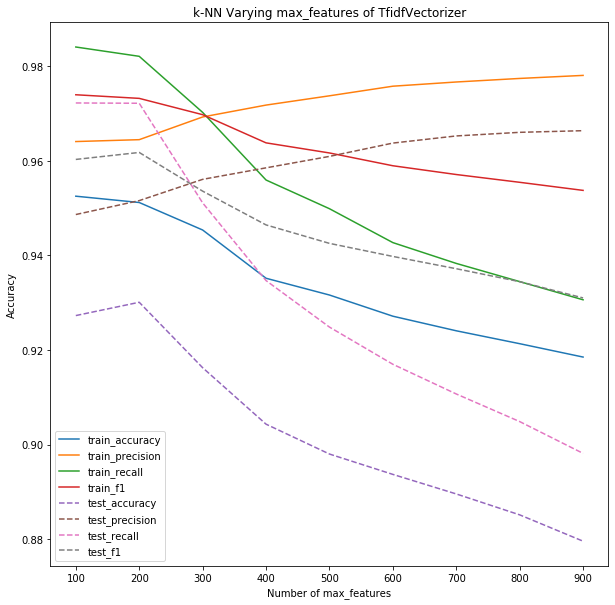

In [175]:
import matplotlib.pyplot as plt
max_features = list(range(100, 1000, 100))
train_accuracy = np.empty(len(score_list))
train_precision = np.empty(len(score_list))
train_recall = np.empty(len(score_list))
train_f1 = np.empty(len(score_list))

test_accuracy = np.empty(len(score_list))
test_precision = np.empty(len(score_list))
test_recall = np.empty(len(score_list))
test_f1 = np.empty(len(score_list))
 
for i,k in enumerate(score_list):
    train_accuracy[i] = k[0]
    train_precision[i] = k[1]
    train_recall[i] = k[2]
    train_f1[i] = k[3]

    test_accuracy[i] = k[4]
    test_precision[i] = k[5]
    test_recall[i] = k[6]
    test_f1[i] = k[7]
 
plt.figure(figsize=(10,10))
plt.title('k-NN Varying max_features of TfidfVectorizer')

plt.plot(max_features, train_accuracy, label='train_accuracy')
plt.plot(max_features, train_precision, label='train_precision')
plt.plot(max_features, train_recall, label='train_recall')
plt.plot(max_features, train_f1, label='train_f1')
plt.plot(max_features, test_accuracy, '--', label='test_accuracy')
plt.plot(max_features, test_precision, '--', label='test_precision')
plt.plot(max_features, test_recall, '--', label='test_recall')
plt.plot(max_features, test_f1, '--', label='test_f1')

plt.legend()
plt.xlabel('Number of max_features')
plt.ylabel('Accuracy')
plt.show()

根据上图，选择max_features=200

accuracy: 0.9993107508507919
precision: 0.9999522771741725
recall: 0.9992846355615611
f1: 0.999618344889002
accuracy: 0.934409281488714
precision: 0.9596175619574789
recall: 0.9682660573749683
f1: 0.9639224110696911
max_features=200, n_neighbors=1执行完成
accuracy: 0.9705058801568042
precision: 0.9999671349930161
recall: 0.9673793816071854
f1: 0.9834033613445378
accuracy: 0.9202228476250646
precision: 0.9719466526509428
recall: 0.9389438943894389
f1: 0.9551602802078963
max_features=200, n_neighbors=2执行完成
accuracy: 0.9640298100257032
precision: 0.973651191969887
recall: 0.9868849852952866
f1: 0.9802234239924209
accuracy: 0.9330308425707886
precision: 0.9543472845042352
recall: 0.9725184056867225
f1: 0.9633471645919779
max_features=200, n_neighbors=3执行完成
accuracy: 0.9545813529386424
precision: 0.9797783488596209
recall: 0.9697321357602734
f1: 0.974729357248432
accuracy: 0.9254494285221986
precision: 0.9625079974408189
recall: 0.9548108657019548
f1: 0.9586439813929777
max_features=200, n_neig

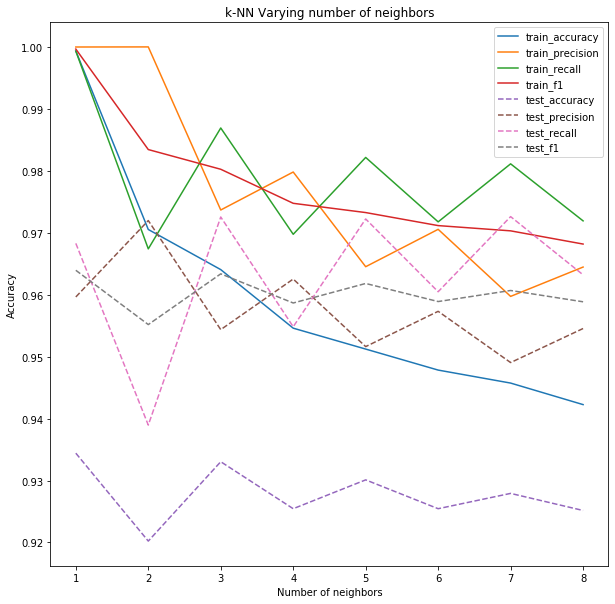

In [181]:
import matplotlib.pyplot as plt 
score_list = []
for n_neighbors in range(1,9):
    score_list.append(get_score_from_varying_parameters(n_neighbors=n_neighbors))
    
n_neighbors = list(range(1,9))
train_accuracy = np.empty(len(score_list))
train_precision = np.empty(len(score_list))
train_recall = np.empty(len(score_list))
train_f1 = np.empty(len(score_list))

test_accuracy = np.empty(len(score_list))
test_precision = np.empty(len(score_list))
test_recall = np.empty(len(score_list))
test_f1 = np.empty(len(score_list))
 
for i,k in enumerate(score_list):
    train_accuracy[i] = k[0]
    train_precision[i] = k[1]
    train_recall[i] = k[2]
    train_f1[i] = k[3]

    test_accuracy[i] = k[4]
    test_precision[i] = k[5]
    test_recall[i] = k[6]
    test_f1[i] = k[7]


plt.figure(figsize=(10,10))
plt.title('k-NN Varying number of neighbors')
plt.plot(n_neighbors, train_accuracy, label='train_accuracy')
plt.plot(n_neighbors, train_precision, label='train_precision')
plt.plot(n_neighbors, train_recall, label='train_recall')
plt.plot(n_neighbors, train_f1, label='train_f1')
plt.plot(n_neighbors, test_accuracy, '--', label='test_accuracy')
plt.plot(n_neighbors, test_precision, '--', label='test_precision')
plt.plot(n_neighbors, test_recall, '--', label='test_recall')
plt.plot(n_neighbors, test_f1, '--', label='test_f1')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

感觉在此测试数据下，k=1,效果最好，因为后面需要查看weights参数的影响，所以选择效果同样不错的k=3吧

accuracy: 0.9640298100257032
precision: 0.973651191969887
recall: 0.9868849852952866
f1: 0.9802234239924209
accuracy: 0.9330308425707886
precision: 0.9543472845042352
recall: 0.9725184056867225
f1: 0.9633471645919779
max_features=200, n_neighbors=3, weights=uniform执行完成
accuracy: 0.9993107508507919
precision: 0.9999522771741725
recall: 0.9992846355615611
f1: 0.999618344889002
accuracy: 0.9373384641893057
precision: 0.956313398469102
recall: 0.9753109926377254
f1: 0.965718774548311
max_features=200, n_neighbors=3, weights=distance执行完成


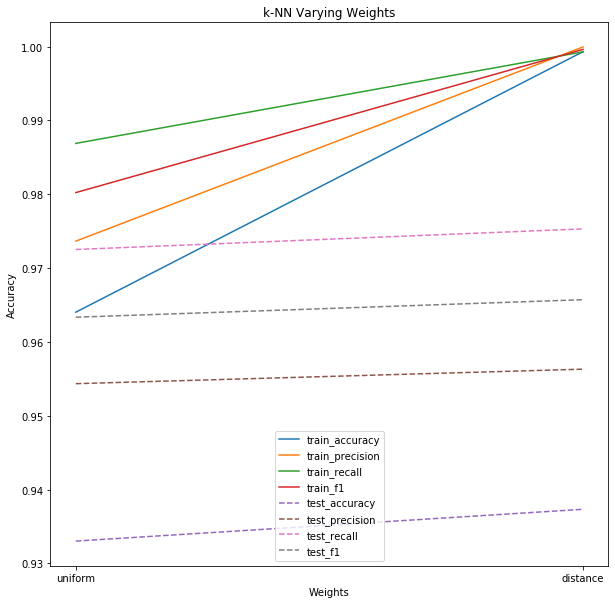

In [186]:
score_list = []
for weights in ['uniform', 'distance']:
    score_list.append(get_score_from_varying_parameters(weights=weights, n_neighbors=3))
    
weights = ['uniform', 'distance']
train_accuracy = np.empty(len(score_list))
train_precision = np.empty(len(score_list))
train_recall = np.empty(len(score_list))
train_f1 = np.empty(len(score_list))

test_accuracy = np.empty(len(score_list))
test_precision = np.empty(len(score_list))
test_recall = np.empty(len(score_list))
test_f1 = np.empty(len(score_list))
 
for i,k in enumerate(score_list):
    train_accuracy[i] = k[0]
    train_precision[i] = k[1]
    train_recall[i] = k[2]
    train_f1[i] = k[3]

    test_accuracy[i] = k[4]
    test_precision[i] = k[5]
    test_recall[i] = k[6]
    test_f1[i] = k[7]


plt.figure(figsize=(10,10))
plt.title('k-NN Varying Weights')
plt.plot(weights, train_accuracy, label='train_accuracy')
plt.plot(weights, train_precision, label='train_precision')
plt.plot(weights, train_recall, label='train_recall')
plt.plot(weights, train_f1, label='train_f1')
plt.plot(weights, test_accuracy, '--', label='test_accuracy')
plt.plot(weights, test_precision, '--', label='test_precision')
plt.plot(weights, test_recall, '--', label='test_recall')
plt.plot(weights, test_f1, '--', label='test_f1')
plt.legend()
plt.xlabel('Weights')
plt.ylabel('Accuracy')
plt.show()

选择distance

accuracy: 0.9993107508507919
precision: 0.9999522771741725
recall: 0.9992846355615611
f1: 0.999618344889002
accuracy: 0.9209120670840273
precision: 0.9755274819763212
recall: 0.9360878395531861
f1: 0.9554008097165992
max_features=200, n_neighbors=3, weights=distance, p=1执行完成
accuracy: 0.9993107508507919
precision: 0.9999522771741725
recall: 0.9992846355615611
f1: 0.999618344889002
accuracy: 0.9373384641893057
precision: 0.956313398469102
recall: 0.9753109926377254
f1: 0.965718774548311
max_features=200, n_neighbors=3, weights=distance, p=2执行完成


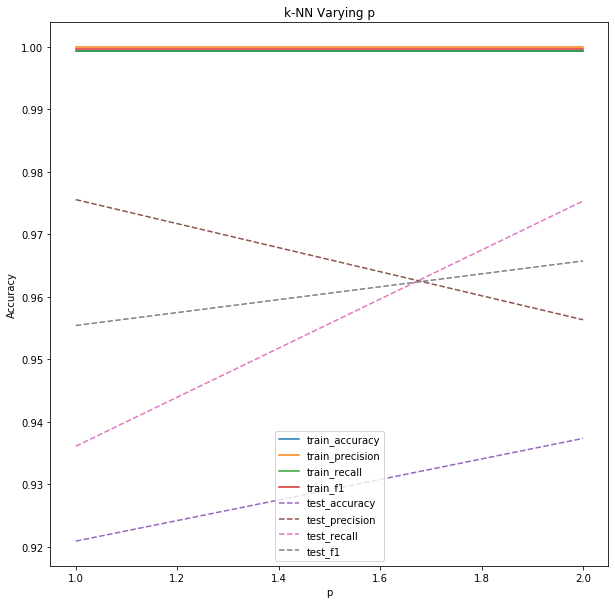

In [189]:
score_list = []
for p in [1, 2]:
    score_list.append(get_score_from_varying_parameters(max_features=200, n_neighbors=3, weights='distance', p=p))
    
p = [1, 2]
train_accuracy = np.empty(len(score_list))
train_precision = np.empty(len(score_list))
train_recall = np.empty(len(score_list))
train_f1 = np.empty(len(score_list))

test_accuracy = np.empty(len(score_list))
test_precision = np.empty(len(score_list))
test_recall = np.empty(len(score_list))
test_f1 = np.empty(len(score_list))
 
for i,k in enumerate(score_list):
    train_accuracy[i] = k[0]
    train_precision[i] = k[1]
    train_recall[i] = k[2]
    train_f1[i] = k[3]

    test_accuracy[i] = k[4]
    test_precision[i] = k[5]
    test_recall[i] = k[6]
    test_f1[i] = k[7]


plt.figure(figsize=(10,10))
plt.title('k-NN Varying p')
plt.plot(p, train_accuracy, label='train_accuracy')
plt.plot(p, train_precision, label='train_precision')
plt.plot(p, train_recall, label='train_recall')
plt.plot(p, train_f1, label='train_f1')
plt.plot(p, test_accuracy, '--', label='test_accuracy')
plt.plot(p, test_precision, '--', label='test_precision')
plt.plot(p, test_recall, '--', label='test_recall')
plt.plot(p, test_f1, '--', label='test_f1')
plt.legend()
plt.xlabel('p')
plt.ylabel('Accuracy')
plt.show()

选择p=2

##### 最终参数：
- max_features=200， n_neighbors=3, p=2, weights='distance'

In [82]:
vectorizer = TfidfVectorizer(max_features=200)
X = vectorizer.fit_transform(corpus)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_tr_arr = X_train.toarray()
X_ts_arr = X_test.toarray()
y_tr_arr = np.array(y_train, dtype='int')
y_ts_arr = np.array(y_test, dtype='int')

knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance', p=2)
knn.fit(X_tr_arr, y_tr_arr)

ValueError: Found input variables with inconsistent numbers of samples: [87052, 2]

### Step8: 不断改变参数，直到性能达到“某个”点。问：“某个”怎么定义？

性能与计算复杂度之间的一个最佳的平衡点

### Step9: 找出所有预测为 1， 但是实际为 0 的文章。 作为抄袭的候选者。

In [ ]:
y_pred = knn.predict(X.toarray())

In [ ]:
df_y_pred = pd.DataFrame(y_pred, columns=['y_pred'], dtype='object')

In [ ]:
df_y_fact = pd.DataFrame(df, columns=['y'])

In [ ]:
df_pred_and_fact = pd.concat([df_y_pred, df_y_fact], axis=1)

In [ ]:
df_pred_and_fact.info()

In [ ]:
df_pred_and_fact.head()

In [ ]:
candidate_knn = df_pred_and_fact[(df_pred_and_fact.y_pred==1)&(df_pred_and_fact.y==0)].index.tolist()

In [79]:
candidate_knn

NameError: name 'candidate_knn' is not defined

In [381]:
len(candidate_knn)

1297

### Step10： 总结该过程，什么是数据思维？什么是机器学习思维？

#### 数据思维
- 样本到全量思维
    以前我们进行数据分析时通常是用样本数据进行研究，样本是指从总体数据中按随机抽取的原则采集的部分数据，所以至今样本思维还是很常见的。究其本质我们很容易发现样本分析是因为传统的手段很难进行大规模的全量分析，因为成本会很高并且效率低下。
    而到了大数据时代，很多信息已经实时数据化、联网化，加上新的大数据技术可以快速高效的处理海量数据。我们花费更低的成本、更低的代价很容易就能做到全量分析。样本分析是以点带面、以偏概全的思维，而全量分析真正反映了全部数据的客观事实。
- 精准到模糊
    传统数据分析的时候由于数据量小，分析人员可以对数据做精准分析，甚至细化到单条记录。并且出现异常的时候，还能对单条数据做异常原因等深究工作。但等到了大数据时代，随着数据的爆发，已经很难让分析人员能够关注更多细节。精准性思维是建立在少量数据的基础上，基于精准得出的规律，在海量数据面前也会产生变异甚至突变。所以在大数据时代我们分析更强调大概率事件，也即所谓的模糊性。这不是说我们要抛弃严谨的精准思维，而是说我们应该增加大数据下的模糊思维。
- 因果到关联
    我们每个人开始上学的时候，语文课上学的句式中就有一个因为什么所以什么，典型的因果关系。从小的数学课上，学了大量的公式，通过公式的推理和证明，也是一直在强调因果关系。至此我们每个人在看到问题和现象的时候，总是不断问自己因为什么。所以可见因果思维在我们每个人脑中已经形成了很深的烙印。但学习数据挖掘的人都知道一个“啤酒与尿布”的故事。故事的内容是这样，沃尔玛的工作人员在按周期统计产品的销售信息时发现一个奇怪的现象：每逢周末，某一连锁超市啤酒和尿片的销量都很大。为了搞清楚这个原因，他们派出工作人员进行调查。通过观察和走访后了解到，在美国有孩子的家庭中，太太经常嘱咐丈夫下班后要为孩子买尿片，而丈夫们在买完尿片以后又顺手带回了假期看球赛时自己爱喝的啤酒，因此啤酒和尿片销量一起增长。搞清原因后，沃尔玛的工作人员打破常规，尝试将啤酒和尿片摆在一起，结果使得啤酒和尿片的销量双双激增，为商家带来了大量的利润。通过这个故事我们可以看出本来商品中尿布与啤酒两个风马牛不相及的东西，关联在一起销量增加了。数据挖掘中一个算法叫关联规则分析，就是来挖掘数据关联的特征。通过数据的挖掘我们能够看到数据的关联现象，但我们不一定知道他的因果关系。因为关联关系体现了数据思维视角看现象，而因果关系体现了从业务视角看现象。
###### 摘自：https://zhuanlan.zhihu.com/p/23971154

#### 机器学习思维
- 通过大数据，算法得出一个相应的模型，由x得到y，利用模型预测test_x

### (Optional)使用第4课讲解的 edit distance，在涉嫌抄袭的文章中，找到其重复的文字与被修改过的文字。 

In [39]:
from functools import lru_cache

In [53]:
def get_edit_distance(string1, string2):    
    i = 0
    solution = {}
    
    @lru_cache(maxsize=2**10)
    def edit_distance(string1, string2):
        nonlocal i
        i += 1

        if len(string1) == 0: return len(string2)
        if len(string2) == 0: return len(string1)

        tail_s1 = string1[-1]
        tail_s2 = string2[-1] 


        if tail_s1 == tail_s2:
            candidates = [(edit_distance(string1[:-1], string2[:-1]) + 0, '')]
            # no edits
        else:
            candidates = [
            (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),
            # delete tail_s1 for string 1; edit_distance + 1 for each deletion
            (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),
            # add tail_s2 to string 1; edit_distance + 1 for each addition
            (edit_distance(string1[:-1], string2[:-1]) + 1, 
                            'SUB {} => {}'.format(tail_s1, tail_s2))
        ]


        min_distance, operation = min(candidates, key=lambda x: x[0])
        # find the minimal edit distance among all possible operations

        solution[(string1, string2)] = operation # store solution to dictionary

        return min_distance  
    
    string1 = string1
    string2 = string2
    min_distance = edit_distance(string1, string2)
    return (min_distance, solution)

In [54]:
min_distance, solution = get_edit_distance('打篮球', '打进NBA')

In [55]:
min_distance

4

In [56]:
solution

{('打', '打'): '',
 ('打', '打进'): 'ADD 进',
 ('打', '打进N'): 'ADD N',
 ('打', '打进NB'): 'ADD B',
 ('打', '打进NBA'): 'ADD A',
 ('打篮', '打'): 'DEL 篮',
 ('打篮', '打进'): 'SUB 篮 => 进',
 ('打篮', '打进N'): 'ADD N',
 ('打篮', '打进NB'): 'ADD B',
 ('打篮', '打进NBA'): 'ADD A',
 ('打篮球', '打'): 'DEL 球',
 ('打篮球', '打进'): 'DEL 球',
 ('打篮球', '打进N'): 'SUB 球 => N',
 ('打篮球', '打进NB'): 'ADD B',
 ('打篮球', '打进NBA'): 'ADD A'}

In [57]:
# to parse the solutions, we need to define the exit condition ("查表"过程的终止条件)
# in this case, the exit condition is
# -- if the two strings are exactly the same, we stop editing

def stop_edit(string1, string2): return string1 == string2


# now we look for solutions in the "solution" dictionary

def parse_solution(string1, string2, solution_dic):
    
    parsed_solutions = [] 
    
    while not stop_edit(string1, string2):       
        
        if string2 == '':
            parsed_solutions.append('DEL {}'.format(string1[-1]))
            string1 = string1[:-1]
            continue
            
        if string1 == '':
            parsed_solutions.append('ADD {}'.format(string2[-1]))
            string2 = string2[:-1]
            continue
        
        operation = solution_dic[(string1, string2)] # "查表" 过程
        if 'SUB' in operation:
            string1, string2 = string1[:-1], string2[:-1] 
            # if substitution, both forward and compare
        elif operation == '':
            string1, string2 = string1[:-1], string2[:-1]
            # if no edits, both forward and compare
        elif 'DEL' in operation:
            string1, string2 = string1[:-1], string2 
            # delete tail of string1 and then compare
        elif 'ADD' in operation:
            string1, string2 = string1, string2[:-1] 
            # delete tail of string2 and then compare
#         print(string1, string2)
        if operation != '':
            parsed_solutions.append(operation)
    
    return parsed_solutions

In [58]:
parsed_solutions = parse_solution('打篮球', '打进NBA', solution)

In [59]:
parsed_solutions

['ADD A', 'ADD B', 'SUB 球 => N', 'SUB 篮 => 进']

In [60]:
list(set([1, 2, 3]) - set([1]))

[2, 3]

In [61]:
def get_repetition(string1, parsed_solutions):
    string1_list = [word for word in string1]
    alter_list = [word[4] for word in parsed_solutions]
    repetition_list = list(set(string1_list) - set(alter_list))
    return repetition_list

In [62]:
get_repetition('打篮球', parsed_solutions)

['打']

In [69]:
def plagiarism_analysis(suspect_id, content):
    # 找到最长
    content_max = max([len(i) for i in content])
    min_edit_distance = content_max
    suspect = content[suspect_id]
    for i, document in enumerate(content):
        if i != suspect_id:
            edit_distance, solution = get_edit_distance(suspect, document) 
            edit_distance_modified = edit_distance + content_max - max(len(content[suspect_id]), len(document))
            if edit_distance < min_edit_distance:
                min_edit_distance = edit_distance_modified
                source_id = i
    return source_id, solution         
        

In [ ]:
source_id, solution = plagiarism_analysis(24, [''.join(token(content)) for content in df['content']])

#### 太慢，利用tfidf定位原文章

### Step11: 利用第8课讲述的新模型，进行操作，感受其中不同的参数、模型对性能的影响。

### LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

In [38]:
def get_score_from_varying_parameters(max_features, class_weight):
    vectorizer = TfidfVectorizer(max_features=max_features)
    X = vectorizer.fit_transform(corpus)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_tr_arr = X_train.toarray()
    X_ts_arr = X_test.toarray()
    y_tr_arr = np.array(y_train, dtype='int')
    y_ts_arr = np.array(y_test, dtype='int')
    
    clf = LogisticRegression(n_jobs=-1)
    clf.fit(X_tr_arr, y_tr_arr)
    
    y_tr_pred = clf.predict(X_tr_arr)
    train_accuracy, train_precision, train_recall, train_f1 = get_F1(y_tr_pred, y_tr_arr)
    y_ts_pred = clf.predict(X_ts_arr)
    test_accuracy, test_precision, test_recall, test_f1 = get_F1(y_ts_pred, y_ts_arr)
    
    print('max_features=%s 执行完成' % (str(max_features)))
    
    return train_accuracy, train_precision, train_recall, train_f1, test_accuracy, test_precision, test_recall, test_f1

In [41]:
score_list = []
for max_features in range(1000, 10000, 1000):
    score_list.append(get_score_from_varying_parameters(max_features=max_features))

C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


accuracy: 0.9813902729713818
precision: 0.9840354488458698
recall: 0.9955488434941578
f1: 0.9897586648333412
accuracy: 0.9777726724484521
precision: 0.9813341684935797
recall: 0.9943513582127443
f1: 0.9877998802055421
max_features=1000


C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


accuracy: 0.9816774601168852
precision: 0.9832358429908887
recall: 0.996709323583181
f1: 0.98992673992674
accuracy: 0.97805984722302
precision: 0.9803774528183977
recall: 0.9956841838029957
f1: 0.9879715347314063
max_features=2000


C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


accuracy: 0.9818784911187375
precision: 0.9830274726135811
recall: 0.9971544392337652
f1: 0.9900405637893207
accuracy: 0.9770834529894894
precision: 0.9786199588605622
recall: 0.9964457984259965
f1: 0.9874524356111827
max_features=3000


C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


accuracy: 0.9824528654097443
precision: 0.9832500274204415
recall: 0.9975677609093077
f1: 0.9903571484936005
accuracy: 0.9765665383952674
precision: 0.9779521674140508
recall: 0.9965727341964966
f1: 0.9871746510750661
max_features=4000


C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


accuracy: 0.9827113338406973
precision: 0.983345606091466
recall: 0.9977585247595581
f1: 0.9904996370293219
accuracy: 0.9764516684854403
precision: 0.9778303649271392
recall: 0.9965727341964966
f1: 0.9871125919406551
max_features=5000


C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


accuracy: 0.9830846771298517
precision: 0.9836553680284581
recall: 0.9978539066846832
f1: 0.9907037674205715
accuracy: 0.9759347538912182
precision: 0.9771638354800573
recall: 0.9966996699669967
f1: 0.9868350771357652
max_features=6000


C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


accuracy: 0.9829985209862007
precision: 0.9835022795995425
recall: 0.9979174946347668
f1: 0.990657450367705
accuracy: 0.9759921888461317
precision: 0.9771058852805773
recall: 0.9968266057374968
f1: 0.9868677348413445
max_features=7000


C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


accuracy: 0.9830990364871268
precision: 0.9834132130438868
recall: 0.998124155472538
f1: 0.9907140772064915
accuracy: 0.9752455344322555
precision: 0.9764347447615495
recall: 0.9966996699669967
f1: 0.9864631426866421
max_features=8000


C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


accuracy: 0.9833575049180798
precision: 0.9835541772389813
recall: 0.9982672283602257
f1: 0.9908560879204108
accuracy: 0.9751306645224284
precision: 0.9763133354056575
recall: 0.9966996699669967
f1: 0.986401180867435
max_features=9000


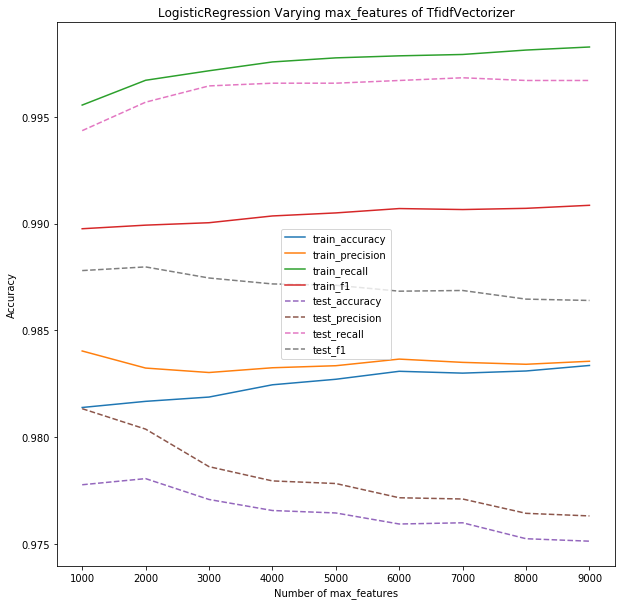

In [44]:
import matplotlib.pyplot as plt
max_features = range(1000, 10000, 1000)
train_accuracy = np.empty(len(score_list))
train_precision = np.empty(len(score_list))
train_recall = np.empty(len(score_list))
train_f1 = np.empty(len(score_list))

test_accuracy = np.empty(len(score_list))
test_precision = np.empty(len(score_list))
test_recall = np.empty(len(score_list))
test_f1 = np.empty(len(score_list))
 
for i,k in enumerate(score_list):
    train_accuracy[i] = k[0]
    train_precision[i] = k[1]
    train_recall[i] = k[2]
    train_f1[i] = k[3]

    test_accuracy[i] = k[4]
    test_precision[i] = k[5]
    test_recall[i] = k[6]
    test_f1[i] = k[7]
 
plt.figure(figsize=(10,10))
plt.title('LogisticRegression Varying max_features of TfidfVectorizer')

plt.plot(max_features, train_accuracy, label='train_accuracy')
plt.plot(max_features, train_precision, label='train_precision')
plt.plot(max_features, train_recall, label='train_recall')
plt.plot(max_features, train_f1, label='train_f1')
plt.plot(max_features, test_accuracy, '--', label='test_accuracy')
plt.plot(max_features, test_precision, '--', label='test_precision')
plt.plot(max_features, test_recall, '--', label='test_recall')
plt.plot(max_features, test_f1, '--', label='test_f1')

plt.legend()
plt.xlabel('Number of max_features')
plt.ylabel('Accuracy')
plt.show()

#### 选2000

In [45]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(corpus)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_tr_arr = X_train.toarray()
X_ts_arr = X_test.toarray()
y_tr_arr = np.array(y_train, dtype='int')
y_ts_arr = np.array(y_test, dtype='int')

In [54]:
# 去掉max_features,节约时间
def get_score_from_varying_parameters(class_weight):   
    clf = LogisticRegression(n_jobs=-1, class_weight=class_weight)
    clf.fit(X_tr_arr, y_tr_arr)
    
    y_tr_pred = clf.predict(X_tr_arr)
    train_accuracy, train_precision, train_recall, train_f1 = get_F1(y_tr_pred, y_tr_arr)
    y_ts_pred = clf.predict(X_ts_arr)
    test_accuracy, test_precision, test_recall, test_f1 = get_F1(y_ts_pred, y_ts_arr)
    
    print('max_features=2000, class_wight=%s 执行完成' % (str(class_weight)))
    
    return train_accuracy, train_precision, train_recall, train_f1, test_accuracy, test_precision, test_recall, test_f1

C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


accuracy: 0.9289211814879166
precision: 0.998109153416416
recall: 0.9230585803990143
f1: 0.9591179385530229
accuracy: 0.9279765665383952
precision: 0.9976664378860672
recall: 0.9225691799949226
f1: 0.9586493437974015
max_features=2000, class_wight={0: 0.9, 1: 0.1} 执行完成


C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


accuracy: 0.9709653795896096
precision: 0.9947343615413369
recall: 0.9730069151895716
f1: 0.9837506830820663
accuracy: 0.9670323358796163
precision: 0.9934347373894956
recall: 0.9699796902767199
f1: 0.9815671162491971
max_features=2000, class_wight={0: 0.8, 1: 0.2} 执行完成


C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


accuracy: 0.9790640570928045
precision: 0.989001894029827
recall: 0.9878070105714967
f1: 0.9884040911766109
accuracy: 0.9746711848831199
precision: 0.986592107771494
recall: 0.9854023863924855
f1: 0.9859968881973772
max_features=2000, class_wight={0: 0.7, 1: 0.3} 执行完成


C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


accuracy: 0.9778291523671401
precision: 0.9800654054984431
recall: 0.9957078133693665
f1: 0.9878246881259167
accuracy: 0.9741542702888978
precision: 0.9770602169305573
recall: 0.9947956334094948
f1: 0.9858481665513553
max_features=2000, class_wight={0: 0.6, 1: 0.5} 执行完成


C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


accuracy: 0.9739521259028446
precision: 0.97496540249724
recall: 0.9967570145457436
f1: 0.9857407873223494
accuracy: 0.9701338234449486
precision: 0.9717612088184295
recall: 0.9959380553439959
f1: 0.9837011033099298
max_features=2000, class_wight={0: 0.5, 1: 0.5} 执行完成


C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


accuracy: 0.9636277480219986
precision: 0.9990576331713124
recall: 0.9606390588983388
f1: 0.9794717605011711
accuracy: 0.9599678364252484
precision: 0.997752363323858
recall: 0.9579207920792079
f1: 0.9774309490658291
max_features=2000, class_wight=balanced 执行完成


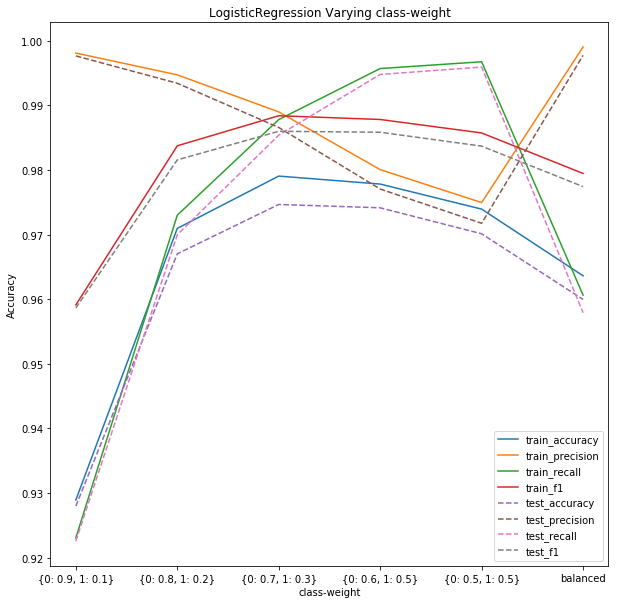

In [57]:
score_list = []
class_weights = [{0: 0.9, 1: 0.1}, {0: 0.8, 1: 0.2}, {0: 0.7, 1: 0.3}, {0: 0.6, 1: 0.5}, {0:0.5, 1: 0.5}, 'balanced']
for i, class_weight in enumerate(class_weights):
    score_list.append(get_score_from_varying_parameters(class_weight=class_weight))
    class_weights[i] = str(class_weight)
    
train_accuracy = np.empty(len(score_list))
train_precision = np.empty(len(score_list))
train_recall = np.empty(len(score_list))
train_f1 = np.empty(len(score_list))

test_accuracy = np.empty(len(score_list))
test_precision = np.empty(len(score_list))
test_recall = np.empty(len(score_list))
test_f1 = np.empty(len(score_list))
 
for i,k in enumerate(score_list):
    train_accuracy[i] = k[0]
    train_precision[i] = k[1]
    train_recall[i] = k[2]
    train_f1[i] = k[3]

    test_accuracy[i] = k[4]
    test_precision[i] = k[5]
    test_recall[i] = k[6]
    test_f1[i] = k[7]


plt.figure(figsize=(10,10))
plt.title('LogisticRegression Varying class-weight')
plt.plot(class_weights, train_accuracy, label='train_accuracy')
plt.plot(class_weights, train_precision, label='train_precision')
plt.plot(class_weights, train_recall, label='train_recall')
plt.plot(class_weights, train_f1, label='train_f1')
plt.plot(class_weights, test_accuracy, '--', label='test_accuracy')
plt.plot(class_weights, test_precision, '--', label='test_precision')
plt.plot(class_weights, test_recall, '--', label='test_recall')
plt.plot(class_weights, test_f1, '--', label='test_f1')
plt.legend()
plt.xlabel('class-weight')
plt.ylabel('Accuracy')
plt.show()

- 根据acc和f1选择{0: 0.7, 1: 0.3}

In [58]:
clf = LogisticRegression(n_jobs=-1, class_weight={0: 0.7, 1: 0.3})
clf.fit(X_tr_arr, y_tr_arr)

C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ryan Wu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight={0: 0.7, 1: 0.3}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [59]:
y_pred = clf.predict(X.toarray())

In [60]:
df_y_pred = pd.DataFrame(y_pred, columns=['y_pred'], dtype='object')

In [61]:
df_y_fact = pd.DataFrame(df, columns=['y'])

In [62]:
df_pred_and_fact = pd.concat([df_y_pred, df_y_fact], axis=1)

In [63]:
df_pred_and_fact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89611 entries, 0 to 89610
Data columns (total 2 columns):
y_pred    87052 non-null object
y         87052 non-null object
dtypes: object(2)
memory usage: 2.1+ MB


In [64]:
df_pred_and_fact.head()

,y_pred,y
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0


In [68]:
candidate = df_pred_and_fact[(df_pred_and_fact.y_pred==1)&(df_pred_and_fact==0)].index.tolist()

MemoryError: 

In [80]:
candidate_LogisticRegression = []
for i, y in enumerate(zip(df_pred_and_fact['y_pred'], df_pred_and_fact['y'])):
    if y[0] == 1 and y[1] == 0:
        candidate.append(i)

In [81]:
candidate_LogisticRegression

[]

In [74]:
len(candidate_LogisticRegression)

1425

### SVM

In [22]:
from sklearn.svm import SVC

In [23]:
y = df['y']

In [24]:
def get_score_from_varying_parameters(max_features):
    vectorizer = TfidfVectorizer(max_features=max_features)
    X = vectorizer.fit_transform(corpus)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_tr_arr = X_train.toarray()
    X_ts_arr = X_test.toarray()
    y_tr_arr = np.array(y_train, dtype='int')
    y_ts_arr = np.array(y_test, dtype='int')
    
    clf = SVC(gamma='auto')
    clf.fit(X_tr_arr, y_tr_arr)
    
    y_tr_pred = clf.predict(X_tr_arr)
    train_accuracy, train_precision, train_recall, train_f1 = get_F1(y_tr_pred, y_tr_arr)
    y_ts_pred = clf.predict(X_ts_arr)
    test_accuracy, test_precision, test_recall, test_f1 = get_F1(y_ts_pred, y_ts_arr)
    
    print('max_features=%s 执行完成' % (str(max_features)))
    
    return train_accuracy, train_precision, train_recall, train_f1, test_accuracy, test_precision, test_recall, test_f1

In [25]:
score_list = []
for max_features in range(100, 1000, 100):
    score_list.append(get_score_from_varying_parameters(max_features=max_features))

accuracy: 0.9408394480263064
precision: 0.9423184000240779
recall: 0.9954375645815118
f1: 0.9681499118711152
accuracy: 0.9418183906725633
precision: 0.943131950706342
recall: 0.9957476516882457
f1: 0.9687258806458584
max_features=100 执行完成
accuracy: 0.905242601341164
precision: 0.9050674800725159
recall: 0.9999841030124791
f1: 0.950161245251384
accuracy: 0.9067830681752915
precision: 0.9066114275850164
recall: 1.0
f1: 0.9510185604345858
max_features=200 执行完成
accuracy: 0.903275369394466
precision: 0.903275369394466
recall: 1.0
f1: 0.949179907352919
accuracy: 0.9049451496180575
precision: 0.9049451496180575
recall: 1.0
f1: 0.9501010040100099
max_features=300 执行完成
accuracy: 0.903275369394466
precision: 0.903275369394466
recall: 1.0
f1: 0.949179907352919
accuracy: 0.9049451496180575
precision: 0.9049451496180575
recall: 1.0
f1: 0.9501010040100099
max_features=400 执行完成
accuracy: 0.903275369394466
precision: 0.903275369394466
recall: 1.0
f1: 0.949179907352919
accuracy: 0.9049451496180575
prec

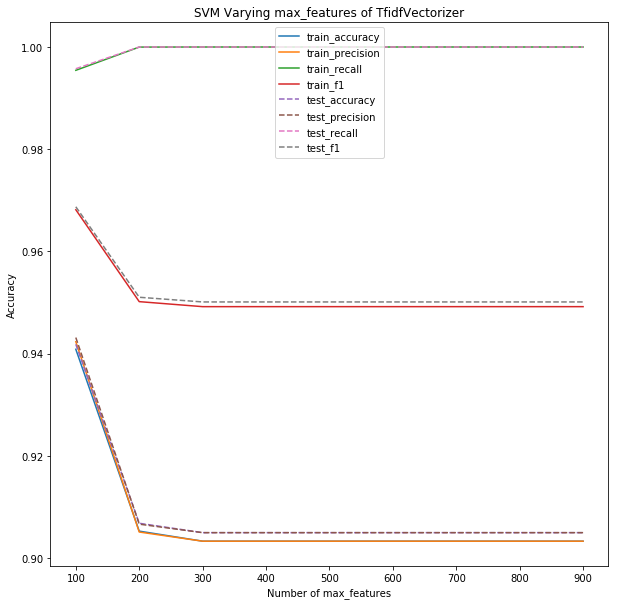

In [27]:
import matplotlib.pyplot as plt
max_features = range(100, 1000, 100)
train_accuracy = np.empty(len(score_list))
train_precision = np.empty(len(score_list))
train_recall = np.empty(len(score_list))
train_f1 = np.empty(len(score_list))

test_accuracy = np.empty(len(score_list))
test_precision = np.empty(len(score_list))
test_recall = np.empty(len(score_list))
test_f1 = np.empty(len(score_list))
 
for i,k in enumerate(score_list):
    train_accuracy[i] = k[0]
    train_precision[i] = k[1]
    train_recall[i] = k[2]
    train_f1[i] = k[3]

    test_accuracy[i] = k[4]
    test_precision[i] = k[5]
    test_recall[i] = k[6]
    test_f1[i] = k[7]
 
plt.figure(figsize=(10,10))
plt.title('SVM Varying max_features of TfidfVectorizer')

plt.plot(max_features, train_accuracy, label='train_accuracy')
plt.plot(max_features, train_precision, label='train_precision')
plt.plot(max_features, train_recall, label='train_recall')
plt.plot(max_features, train_f1, label='train_f1')
plt.plot(max_features, test_accuracy, '--', label='test_accuracy')
plt.plot(max_features, test_precision, '--', label='test_precision')
plt.plot(max_features, test_recall, '--', label='test_recall')
plt.plot(max_features, test_f1, '--', label='test_f1')

plt.legend()
plt.xlabel('Number of max_features')
plt.ylabel('Accuracy')
plt.show()

In [32]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(corpus)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_tr_arr = X_train.toarray()
X_ts_arr = X_test.toarray()
y_tr_arr = np.array(y_train, dtype='int')
y_ts_arr = np.array(y_test, dtype='int')

In [45]:
def get_score_from_varying_parameters(C, class_weight, kernel):    
    clf = SVC(gamma='auto', C=C, class_weight=class_weight, kernel = kernel)
    clf.fit(X_tr_arr, y_tr_arr)
    
    y_tr_pred = clf.predict(X_tr_arr)
    train_accuracy, train_precision, train_recall, train_f1 = get_F1(y_tr_pred, y_tr_arr)
    y_ts_pred = clf.predict(X_ts_arr)
    test_accuracy, test_precision, test_recall, test_f1 = get_F1(y_ts_pred, y_ts_arr)
    
    print('max_features=1000, C=%s, class_weight=%s, kernel=%s 执行完成' % (str(C), str(class_weight), str(kernel)))
    
    return train_accuracy, train_precision, train_recall, train_f1, test_accuracy, test_precision, test_recall, test_f1

In [36]:
score_list = []
for C in [1, 10, 100, 1000, 2000, 3000]:
    score_list.append(get_score_from_varying_parameters(C=C))

accuracy: 0.903275369394466
precision: 0.903275369394466
recall: 1.0
f1: 0.949179907352919
accuracy: 0.9049451496180575
precision: 0.9049451496180575
recall: 1.0
f1: 0.9501010040100099
max_features=100, C=1 执行完成
accuracy: 0.9139730905644663
precision: 0.9131507883504166
recall: 0.9998569271123122
f1: 0.9545389010722172
accuracy: 0.9142496123140543
precision: 0.9138761534443736
recall: 0.9994287890327495
f1: 0.9547397459605298
max_features=100, C=10 执行完成
accuracy: 0.9780589020835427
precision: 0.9804913181668728
recall: 0.9955170495191161
f1: 0.9879470553899065
accuracy: 0.9759921888461317
precision: 0.9793125
recall: 0.9944782939832445
f1: 0.986837133140194
max_features=100, C=100 执行完成
accuracy: 0.9909679642739191
precision: 0.994065752729119
recall: 0.9959462681821795
f1: 0.995005121933788
accuracy: 0.9882258342427201
precision: 0.9927752075543443
recall: 0.9942244224422442
f1: 0.9934992865070555
max_features=100, C=1000 执行完成
accuracy: 0.9921741502850332
precision: 0.9951249722107537


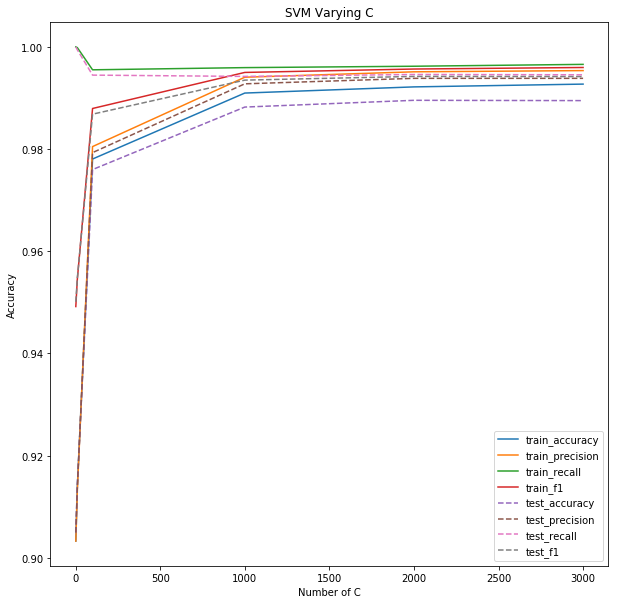

In [37]:
C = [1, 10, 100, 1000, 2000, 3000]
train_accuracy = np.empty(len(score_list))
train_precision = np.empty(len(score_list))
train_recall = np.empty(len(score_list))
train_f1 = np.empty(len(score_list))

test_accuracy = np.empty(len(score_list))
test_precision = np.empty(len(score_list))
test_recall = np.empty(len(score_list))
test_f1 = np.empty(len(score_list))
 
for i,k in enumerate(score_list):
    train_accuracy[i] = k[0]
    train_precision[i] = k[1]
    train_recall[i] = k[2]
    train_f1[i] = k[3]

    test_accuracy[i] = k[4]
    test_precision[i] = k[5]
    test_recall[i] = k[6]
    test_f1[i] = k[7]
 
plt.figure(figsize=(10,10))
plt.title('SVM Varying C')

plt.plot(C, train_accuracy, label='train_accuracy')
plt.plot(C, train_precision, label='train_precision')
plt.plot(C, train_recall, label='train_recall')
plt.plot(C, train_f1, label='train_f1')
plt.plot(C, test_accuracy, '--', label='test_accuracy')
plt.plot(C, test_precision, '--', label='test_precision')
plt.plot(C, test_recall, '--', label='test_recall')
plt.plot(C, test_f1, '--', label='test_f1')

plt.legend()
plt.xlabel('Number of C')
plt.ylabel('Accuracy')
plt.show()

c = 1000

In [42]:
score_list = []
class_weight = [{0: 0.9, 1: 0.1}, {0: 0.8, 1: 0.2}, {0: 0.7, 1: 0.3}, {0: 0.6, 1: 0.5}, {0:0.5, 1: 0.5}, 'balanced']
for w in class_weights:
    score_list.append(get_score_from_varying_parameters(C=1000, class_weight=w))

accuracy: 0.9660975574733275
precision: 0.9983537468721191
recall: 0.9640569112153247
f1: 0.9809056280277235
accuracy: 0.9654815920969502
precision: 0.9978973651356856
recall: 0.9638867732927139
f1: 0.9805972558514932
max_features=1000, C=1000, class_weight={0: 0.9, 1: 0.1} 执行完成
accuracy: 0.982682615126147
precision: 0.9973078845130817
recall: 0.9834830299658215
f1: 0.9903472122172597
accuracy: 0.9799552007351674
precision: 0.9963915200721696
recall: 0.9814039096217314
f1: 0.9888409272581935
max_features=1000, C=1000, class_weight={0: 0.8, 1: 0.2} 执行完成
accuracy: 0.9878376243879324
precision: 0.9960830082496642
recall: 0.9904300135124394
f1: 0.9932484675535858
accuracy: 0.9858135661363506
precision: 0.9952736795043751
recall: 0.989020055851739
f1: 0.9921370133384267
max_features=1000, C=1000, class_weight={0: 0.7, 1: 0.3} 执行完成
accuracy: 0.9894171536882009
precision: 0.9936789276411918
recall: 0.9946109212304268
f1: 0.9941447060038611
accuracy: 0.9871345700993625
precision: 0.99289159685

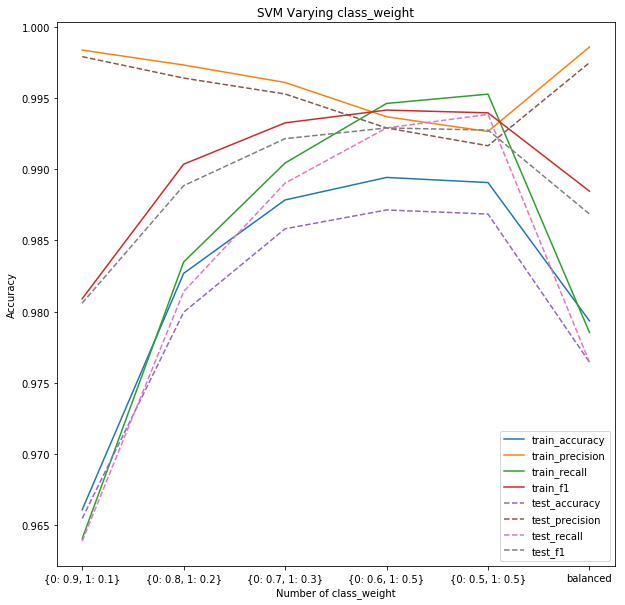

In [44]:

class_weight = [str(w) for w in class_weight]
train_accuracy = np.empty(len(score_list))
train_precision = np.empty(len(score_list))
train_recall = np.empty(len(score_list))
train_f1 = np.empty(len(score_list))

test_accuracy = np.empty(len(score_list))
test_precision = np.empty(len(score_list))
test_recall = np.empty(len(score_list))
test_f1 = np.empty(len(score_list))
 
for i,k in enumerate(score_list):
    train_accuracy[i] = k[0]
    train_precision[i] = k[1]
    train_recall[i] = k[2]
    train_f1[i] = k[3]

    test_accuracy[i] = k[4]
    test_precision[i] = k[5]
    test_recall[i] = k[6]
    test_f1[i] = k[7]
 
plt.figure(figsize=(10,10))
plt.title('SVM Varying class_weight')

plt.plot(class_weight, train_accuracy, label='train_accuracy')
plt.plot(class_weight, train_precision, label='train_precision')
plt.plot(class_weight, train_recall, label='train_recall')
plt.plot(class_weight, train_f1, label='train_f1')
plt.plot(class_weight, test_accuracy, '--', label='test_accuracy')
plt.plot(class_weight, test_precision, '--', label='test_precision')
plt.plot(class_weight, test_recall, '--', label='test_recall')
plt.plot(class_weight, test_f1, '--', label='test_f1')

plt.legend()
plt.xlabel('Number of class_weight')
plt.ylabel('Accuracy')
plt.show()

class_weight = {0:0.5,1:0.5}

In [46]:
score_list = []
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
for k in kernel:
    score_list.append(get_score_from_varying_parameters(C=1000, class_weight={0:0.5,1:0.5}, kernel=k))

accuracy: 0.9948737094527649
precision: 0.9968227743534346
recall: 0.9975041729592242
f1: 0.9971633572501252
accuracy: 0.9916719315375337
precision: 0.9948019017432647
recall: 0.996001523229246
f1: 0.9954013510513463
max_features=1000, C=1000, class_weight={0: 0.5, 1: 0.5}, kernel=linear 执行完成
accuracy: 0.903275369394466
precision: 0.903275369394466
recall: 1.0
f1: 0.949179907352919
accuracy: 0.9049451496180575
precision: 0.9049451496180575
recall: 1.0
f1: 0.9501010040100099
max_features=1000, C=1000, class_weight={0: 0.5, 1: 0.5}, kernel=poly 执行完成
accuracy: 0.9890581697563217
precision: 0.992643211618652
recall: 0.9952626977187823
f1: 0.9939512288054867
accuracy: 0.9868473953247947
precision: 0.9916408080552214
recall: 0.9938436151307438
f1: 0.9927409896345136
max_features=1000, C=1000, class_weight={0: 0.5, 1: 0.5}, kernel=rbf 执行完成
accuracy: 0.9864304073749659
precision: 0.989988295954196
recall: 0.9950401398934902
f1: 0.9925077895204192
accuracy: 0.9842053873987708
precision: 0.98826

ValueError: X.shape[0] should be equal to X.shape[1]

In [47]:
score_list

[(0.9948737094527649,
  0.9968227743534346,
  0.9975041729592242,
  0.9971633572501252,
  0.9916719315375337,
  0.9948019017432647,
  0.996001523229246,
  0.9954013510513463),
 (0.903275369394466,
  0.903275369394466,
  1.0,
  0.949179907352919,
  0.9049451496180575,
  0.9049451496180575,
  1.0,
  0.9501010040100099),
 (0.9890581697563217,
  0.992643211618652,
  0.9952626977187823,
  0.9939512288054867,
  0.9868473953247947,
  0.9916408080552214,
  0.9938436151307438,
  0.9927409896345136),
 (0.9864304073749659,
  0.989988295954196,
  0.9950401398934902,
  0.9925077895204192,
  0.9842053873987708,
  0.9882672049454362,
  0.9943513582127443,
  0.9912999462178493)]

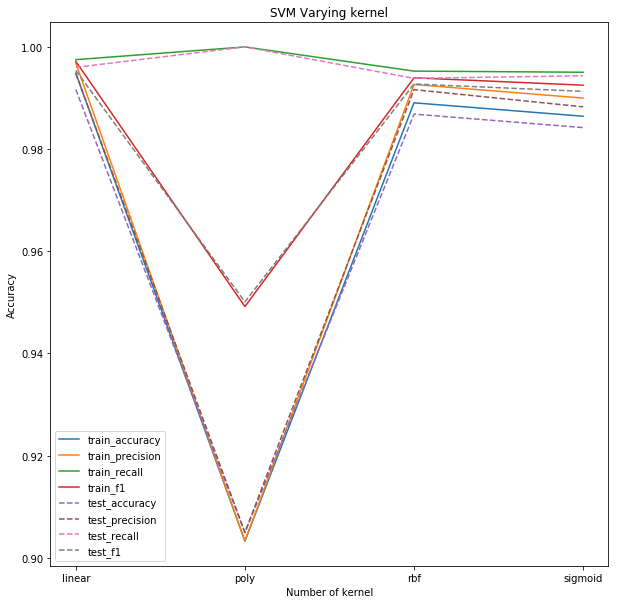

In [48]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
train_accuracy = np.empty(len(score_list))
train_precision = np.empty(len(score_list))
train_recall = np.empty(len(score_list))
train_f1 = np.empty(len(score_list))

test_accuracy = np.empty(len(score_list))
test_precision = np.empty(len(score_list))
test_recall = np.empty(len(score_list))
test_f1 = np.empty(len(score_list))
 
for i,k in enumerate(score_list):
    train_accuracy[i] = k[0]
    train_precision[i] = k[1]
    train_recall[i] = k[2]
    train_f1[i] = k[3]

    test_accuracy[i] = k[4]
    test_precision[i] = k[5]
    test_recall[i] = k[6]
    test_f1[i] = k[7]
 
plt.figure(figsize=(10,10))
plt.title('SVM Varying kernel')

plt.plot(kernel, train_accuracy, label='train_accuracy')
plt.plot(kernel, train_precision, label='train_precision')
plt.plot(kernel, train_recall, label='train_recall')
plt.plot(kernel, train_f1, label='train_f1')
plt.plot(kernel, test_accuracy, '--', label='test_accuracy')
plt.plot(kernel, test_precision, '--', label='test_precision')
plt.plot(kernel, test_recall, '--', label='test_recall')
plt.plot(kernel, test_f1, '--', label='test_f1')

plt.legend()
plt.xlabel('Number of kernel')
plt.ylabel('Accuracy')
plt.show()

关于kernel的视频https://www.bilibili.com/video/av31552048?from=search&seid=14349243184812002653

最终参数：max_features=1000, C=1000, class_weight={0: 0.5, 1: 0.5}, kernel='linear'

In [51]:
clf = SVC(gamma='auto', C=1000, class_weight={0: 0.5, 1: 0.5}, kernel='linear')
clf.fit(X_tr_arr, y_tr_arr)

SVC(C=1000, cache_size=200, class_weight={0: 0.5, 1: 0.5}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
y_pred = clf.predict(X.toarray())

In [58]:
df_y_pred = pd.DataFrame(y_pred, columns=['y_pred'], dtype='object')
df_y_fact = pd.DataFrame(df, columns=['y'])
df_pred_and_fact = pd.concat([df_y_pred, df_y_fact], axis=1)
candidate_svm = []
for i, y in enumerate(zip(df_pred_and_fact['y_pred'], df_pred_and_fact['y'])):
    if y[0] == 1 and y[1] == 0:
        candidate_svm.append(i)

In [59]:
candidate_svm

[51,
 63,
 111,
 212,
 217,
 280,
 303,
 310,
 327,
 328,
 329,
 333,
 353,
 363,
 374,
 386,
 422,
 423,
 443,
 444,
 446,
 471,
 514,
 524,
 539,
 550,
 552,
 554,
 555,
 557,
 563,
 565,
 567,
 568,
 571,
 577,
 579,
 581,
 584,
 587,
 591,
 594,
 597,
 598,
 601,
 616,
 617,
 625,
 627,
 649,
 653,
 669,
 670,
 676,
 677,
 680,
 687,
 704,
 716,
 729,
 773,
 808,
 814,
 818,
 907,
 929,
 932,
 935,
 938,
 939,
 941,
 944,
 949,
 956,
 962,
 978,
 992,
 993,
 999,
 1002,
 1008,
 1012,
 1030,
 1063,
 1100,
 1138,
 1140,
 1147,
 1149,
 1177,
 1179,
 1183,
 1201,
 1327,
 1413,
 1491,
 1500,
 1514,
 1553,
 1630,
 1660,
 1664,
 1682,
 1711,
 1713,
 1757,
 1760,
 1813,
 1862,
 1977,
 2112,
 2144,
 2157,
 2162,
 2228,
 2232,
 2279,
 2337,
 2344,
 2373,
 2395,
 2443,
 2540,
 2541,
 2622,
 2626,
 2750,
 2753,
 2768,
 2774,
 2796,
 2798,
 2802,
 2806,
 2823,
 2826,
 2901,
 2918,
 2974,
 2979,
 3022,
 3025,
 3074,
 3117,
 3170,
 3198,
 3217,
 3223,
 3228,
 3245,
 3248,
 3289,
 3291,
 3295,
 34

In [22]:
import timeit

In [23]:
def clock(func):
    def clocked(*args, **kwargs):
        t0 = timeit.default_timer()
#Define a default timer, in a platform-specific manner. On Windows, time.clock() has microsecond granularity, but time.time()’s granularity is 1/60th of a second. On Unix, time.clock() has 1/100th of a second granularity, and time.time() is much more precise. On either platform, default_timer() measures wall clock time, not the CPU time. This means that other processes running on the same computer may interfere with the timing.
        result = func(*args, **kwargs)
        elapsed = timeit.default_timer() - t0
        name = func.__name__
        arg_str = ', '.join(repr(arg) for arg in args)
#         print(elapsed,'s')
        print('[%0.8fs] %s(%s) -> %r' % (elapsed, name, arg_str, result))
        return result
    return clocked

In [24]:
@clock
def test():
    print('here')

In [70]:
test()

here
[0.00002407s] test() -> None


In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
@clock
def get_score_from_varying_parameters(max_features):
    vectorizer = TfidfVectorizer(max_features=max_features)
    X = vectorizer.fit_transform(corpus)
    y = df['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_tr_arr = X_train.toarray()
    X_ts_arr = X_test.toarray()
    y_tr_arr = np.array(y_train, dtype='int')
    y_ts_arr = np.array(y_test, dtype='int')
    
    gnb = GaussianNB()
    gnb.fit(X_tr_arr, y_tr_arr)
    
    y_tr_pred = gnb.predict(X_tr_arr)
    train_accuracy, train_precision, train_recall, train_f1 = get_F1(y_tr_pred, y_tr_arr)
    y_ts_pred = gnb.predict(X_ts_arr)
    test_accuracy, test_precision, test_recall, test_f1 = get_F1(y_ts_pred, y_ts_arr)
    
    print('max_features=%s 执行完成' % (str(max_features)))
    
    return train_accuracy, train_precision, train_recall, train_f1, test_accuracy, test_precision, test_recall, test_f1

In [26]:
score_list = []
max_features = range(1000, 5000, 1000)
for m in max_features:
    score_list.append(get_score_from_varying_parameters(max_features=m))

accuracy: 0.8450625350009333
precision: 0.9941965217061468
recall: 0.8333359828312534
f1: 0.9066867303168672
accuracy: 0.8474527597495836
precision: 0.9940413335344698
recall: 0.8364432597105864
f1: 0.9084579857999586
max_features=1000 执行完成
[13.81561721s] get_score_from_varying_parameters() -> (0.8450625350009333, 0.9941965217061468, 0.8333359828312534, 0.9066867303168672, 0.8474527597495836, 0.9940413335344698, 0.8364432597105864, 0.9084579857999586)
accuracy: 0.8607573125026924
precision: 0.9938372438372438
recall: 0.8511247118671011
f1: 0.9169613879445437
accuracy: 0.8638217218999483
precision: 0.9932925480946414
recall: 0.8552932216298553
f1: 0.9191419704668691
max_features=2000 执行完成
[17.91391959s] get_score_from_varying_parameters() -> (0.8607573125026924, 0.9938372438372438, 0.8511247118671011, 0.9169613879445437, 0.8638217218999483, 0.9932925480946414, 0.8552932216298553, 0.9191419704668691)
accuracy: 0.8671615858474174
precision: 0.9948170281835621
recall: 0.8574040219378428
f1

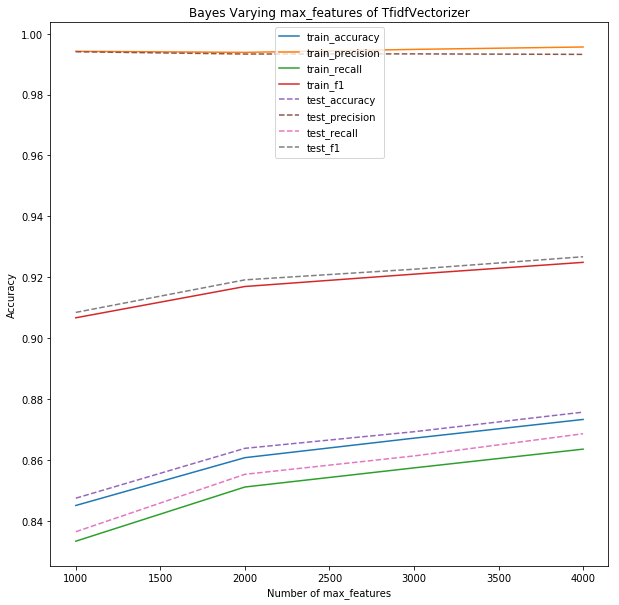

In [29]:
import matplotlib.pyplot as plt
train_accuracy = np.empty(len(score_list))
train_precision = np.empty(len(score_list))
train_recall = np.empty(len(score_list))
train_f1 = np.empty(len(score_list))

test_accuracy = np.empty(len(score_list))
test_precision = np.empty(len(score_list))
test_recall = np.empty(len(score_list))
test_f1 = np.empty(len(score_list))
 
for i,k in enumerate(score_list):
    train_accuracy[i] = k[0]
    train_precision[i] = k[1]
    train_recall[i] = k[2]
    train_f1[i] = k[3]

    test_accuracy[i] = k[4]
    test_precision[i] = k[5]
    test_recall[i] = k[6]
    test_f1[i] = k[7]
 
plt.figure(figsize=(10,10))
plt.title('Bayes Varying max_features of TfidfVectorizer')

plt.plot(max_features, train_accuracy, label='train_accuracy')
plt.plot(max_features, train_precision, label='train_precision')
plt.plot(max_features, train_recall, label='train_recall')
plt.plot(max_features, train_f1, label='train_f1')
plt.plot(max_features, test_accuracy, '--', label='test_accuracy')
plt.plot(max_features, test_precision, '--', label='test_precision')
plt.plot(max_features, test_recall, '--', label='test_recall')
plt.plot(max_features, test_f1, '--', label='test_f1')

plt.legend()
plt.xlabel('Number of max_features')
plt.ylabel('Accuracy')
plt.show()